In [57]:
from PIL import Image
import cv2
import numpy as np
import pandas as pd 
import tensorflow as tf

In [58]:
!pip install paddlepaddle-gpu==2.3.0.post110 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html


# pdf2image

## Installation

In [3]:
!pip install pdf2image
!apt-get update
!apt-get install poppler-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 ht

## Conversion

In [59]:
from pdf2image import convert_from_path

In [60]:
images = convert_from_path('/content/KCI_FI002718081.pdf')

In [7]:
!mkdir Test

In [61]:
#pdf 파일 각페이지를 jpg/JPEG로 저장 
for i in range(len(images)):
  images[i].save('Test/page'+str(i)+'.jpg', 'JPEG')

# Layout

## Installation

In [9]:
#!python3 -m pip install paddlepaddle-gpu
!pip install "paddleocr>=2.0.1"
!pip install protobuf==3.20.0
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 440 kB 26.3 MB/s 
     |████████████████████████████████| 619 kB 66.5 MB/s 
     |████████████████████████████████| 2.2 MB 66.1 MB/s 
     |████████████████████████████████| 148 kB 79.9 MB/s 
     |████████████████████████████████| 965 kB 73.6 MB/s 
     |████████████████████████████████| 8.8 MB 65.4 MB/s 
     |████████████████████████████████| 5.6 MB 70.6 MB/s 
     |████████████████████████████████| 88 kB 9.9 MB/s 
     |████████████████████████████████| 4.9 MB 59.4 MB/s 
     |████████████████████████████████| 399 kB 76.3 MB/s 
     |████████████████████████████████| 204 kB 76.1 MB/s 
     |████████████████████████████████| 132 kB 80.6 MB/s 
     |████████████████████████████████| 2.3 MB 64.4 MB/s 
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116949 sha256=45c2f375a624d7abf98c09cba030588fbe6f11253aac0da69754cdaa1f46c06

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 45219, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 45219 (delta 9), reused 20 (delta 5), pack-reused 45193
Receiving objects: 100% (45219/45219), 338.36 MiB | 38.04 MiB/s, done.
Resolving deltas: 100% (31923/31923), done.


In [11]:
!wget https://paddleocr.bj.bcebos.com/whl/layoutparser-0.0.0-py3-none-any.whl
!pip install -U layoutparser-0.0.0-py3-none-any.whl

--2023-01-02 03:33:56--  https://paddleocr.bj.bcebos.com/whl/layoutparser-0.0.0-py3-none-any.whl
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.46.61, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|103.235.46.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19145360 (18M) [application/octet-stream]
Saving to: ‘layoutparser-0.0.0-py3-none-any.whl’

layoutparser-0.0.0- 100%[===================>]  18.26M  2.84MB/s    in 13s     

2023-01-02 03:34:10 (1.44 MB/s) - ‘layoutparser-0.0.0-py3-none-any.whl’ saved [19145360/19145360]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./layoutparser-0.0.0-py3-none-any.whl
     |████████████████████████████████| 42 kB 1.2 MB/s 
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31547 sha256=58007a82e0a9cb79be659da9279cdfcbb8e92fba780b85e6a41802b6471ccce5
  Stored in

## Table Extraction

In [63]:
import cv2
import layoutparser as lp

# Convert the image from BGR (cv2 default loading style)
# to RGB
image = cv2.imread("/content/Test/page3.jpg")
image = image[..., ::-1]

# load model
model = lp.PaddleDetectionLayoutModel(config_path="lp://PubLayNet/ppyolov2_r50vd_dcn_365e_publaynet/config",
                                threshold=0.5,
                                label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"},
                                enforce_cpu=False,
                                enable_mkldnn=True)#math kernel library
# detect
layout = model.detect(image)

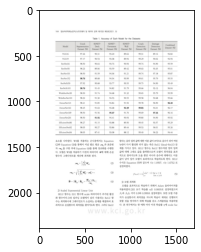

In [65]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [66]:
layout

Layout(_blocks=[TextBlock(block=Rectangle(x_1=176.20626831054688, y_1=1416.7845458984375, x_2=819.1768798828125, y_2=1612.2164306640625), text=None, id=None, type=Text, parent=None, next=None, score=0.9217672348022461), TextBlock(block=Rectangle(x_1=179.60015869140625, y_1=344.3227844238281, x_2=1516.93603515625, y_2=1366.334228515625), text=None, id=None, type=Table, parent=None, next=None, score=0.89203280210495), TextBlock(block=Rectangle(x_1=585.2098388671875, y_1=296.04779052734375, x_2=1112.5994873046875, y_2=329.0098876953125), text=None, id=None, type=Text, parent=None, next=None, score=0.8665469288825989), TextBlock(block=Rectangle(x_1=881.435791015625, y_1=1905.89501953125, x_2=1520.437744140625, y_2=2148.66552734375), text=None, id=None, type=Text, parent=None, next=None, score=0.8359573483467102), TextBlock(block=Rectangle(x_1=880.2554931640625, y_1=1415.83447265625, x_2=1521.3900146484375, y_2=1725.28515625), text=None, id=None, type=Text, parent=None, next=None, score=0.8

In [15]:
x_1=0
y_1=0
x_2=0
y_2=0

for l in layout:
  #print(l)
  if l.type == 'Table':
    x_1 = int(l.block.x_1)
    print(l.block.x_1)
    y_1 = int(l.block.y_1)
    x_2 = int(l.block.x_2)
    y_2 = int(l.block.y_2)
    
    break

179.60016


In [16]:
print(x_1,y_1,x_2,y_2)

179 344 1516 1366


In [17]:
im = cv2.imread('/content/Test/page3.jpg')

In [18]:
cv2.imwrite('ext_im.jpg', im[y_1:y_2,x_1:x_2])

True

# Text Detection and Recognition

In [19]:
from paddleocr import PaddleOCR, draw_ocr

In [20]:
ocr = PaddleOCR(lang='en')
image_path = '/content/ext_im.jpg'
image_cv = cv2.imread(image_path)
image_height = image_cv.shape[0]
image_width = image_cv.shape[1]
output = ocr.ocr(image_path)[0]

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:08<00:00, 489kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:11<00:00, 890kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:07<00:00, 302kiB/s]

[2023/01/02 03:37:08] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set

[2023/01/02 03:37:08] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/01/02 03:37:09] ppocr DEBUG: dt_boxes num : 157, elapse : 0.2008819580078125
[2023/01/02 03:37:09] ppocr DEBUG: rec_res num  : 157, elapse : 0.3943941593170166


In [21]:
print(output)

[[[[269.0, 11.0], [331.0, 11.0], [331.0, 37.0], [269.0, 37.0]], ('Crack', 0.9974668622016907)], [[[418.0, 12.0], [500.0, 12.0], [500.0, 37.0], [418.0, 37.0]], ('SDNET-', 0.9964353442192078)], [[[578.0, 12.0], [663.0, 12.0], [663.0, 36.0], [578.0, 36.0]], ('SDNET-', 0.995093584060669)], [[[738.0, 12.0], [820.0, 12.0], [820.0, 37.0], [738.0, 37.0]], ('SDNET-', 0.9967150092124939)], [[[908.0, 11.0], [974.0, 11.0], [974.0, 37.0], [908.0, 37.0]], ('Crack', 0.9973966479301453)], [[[1055.0, 9.0], [1144.0, 14.0], [1142.0, 42.0], [1054.0, 37.0]], ('Damage', 0.9972259998321533)], [[[1207.0, 26.0], [1313.0, 26.0], [1313.0, 51.0], [1207.0, 51.0]], ('Combined', 0.9975548982620239)], [[[78.0, 42.0], [143.0, 42.0], [143.0, 67.0], [78.0, 67.0]], ('Model', 0.9983161687850952)], [[[233.0, 43.0], [368.0, 43.0], [368.0, 67.0], [233.0, 67.0]], ('Segmentation', 0.9979457855224609)], [[[432.0, 42.0], [489.0, 42.0], [489.0, 67.0], [432.0, 67.0]], ('Deck', 0.9973151683807373)], [[[570.0, 43.0], [670.0, 43.0], 

In [22]:
boxes = [line[0] for line in output]
texts = [line[1][0] for line in output]
probabilities = [line[1][1] for line in output]

In [23]:
image_boxes = image_cv.copy()


In [24]:
for box,text in zip(boxes,texts):
  cv2.rectangle(image_boxes, (int(box[0][0]),int(box[0][1])), (int(box[2][0]),int(box[2][1])),(0,0,255),1)
  cv2.putText(image_boxes, text,(int(box[0][0]),int(box[0][1])),cv2.FONT_HERSHEY_SIMPLEX,1,(222,0,0),1)

In [25]:
cv2.imwrite('detections.jpg', image_boxes)

True

# Reconstruction

## Get Horizontal and Vertical Lines

In [26]:
im = image_cv.copy()

In [27]:
horiz_boxes = []
vert_boxes = []

for box in boxes:
  x_h, x_v = 0,int(box[0][0])
  y_h, y_v = int(box[0][1]),0
  width_h,width_v = image_width, int(box[2][0]-box[0][0])
  height_h,height_v = int(box[2][1]-box[0][1]),image_height

  horiz_boxes.append([x_h,y_h,x_h+width_h,y_h+height_h])
  vert_boxes.append([x_v,y_v,x_v+width_v,y_v+height_v])

  cv2.rectangle(im,(x_h,y_h), (x_h+width_h,y_h+height_h),(0,0,255),1)
  cv2.rectangle(im,(x_v,y_v), (x_v+width_v,y_v+height_v),(0,255,0),1)
  

In [28]:
cv2.imwrite('horiz_vert.jpg',im)

True

## Non-Max Suppression

In [29]:
horiz_out = tf.image.non_max_suppression(
    horiz_boxes,
    probabilities,
    max_output_size = 1000,
    iou_threshold=0.1,
    score_threshold=float('-inf'),
    name=None
)

In [30]:
horiz_lines = np.sort(np.array(horiz_out))
print(horiz_lines)

[  0   7  15  25  36  41  50  56  63  76  80  90 100 107 114 122 131 140
 146 150]


In [31]:
im_nms = image_cv.copy()

In [32]:
for val in horiz_lines:
  cv2.rectangle(im_nms, (int(horiz_boxes[val][0]),int(horiz_boxes[val][1])), (int(horiz_boxes[val][2]),int(horiz_boxes[val][3])),(0,0,255),1)
  

In [33]:
cv2.imwrite('im_nms.jpg',im_nms)

True

In [34]:
vert_out = tf.image.non_max_suppression(
    vert_boxes,
    probabilities,
    max_output_size = 1000,
    iou_threshold=0.1,
    score_threshold=float('-inf'),
    name=None
)

In [35]:
print(vert_out)

tf.Tensor([ 25  90  92  63 150 152 155  37], shape=(8,), dtype=int32)


In [36]:
vert_lines = np.sort(np.array(vert_out))
print(vert_lines)

[ 25  37  63  90  92 150 152 155]


In [37]:
for val in vert_lines:
  cv2.rectangle(im_nms, (int(vert_boxes[val][0]),int(vert_boxes[val][1])), (int(vert_boxes[val][2]),int(vert_boxes[val][3])),(255,0,0),1)
  

In [38]:
cv2.imwrite('im_nms.jpg',im_nms)

True

## Convert to CSV

In [39]:
out_array = [["" for i in range(len(vert_lines))] for j in range(len(horiz_lines))]
print(np.array(out_array).shape)
print(out_array)

(20, 8)
[['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', ''], ['', '', '', '', '', '', '', '']]


In [41]:
unordered_boxes = []

for i in vert_lines:
  print(vert_boxes[i])
  unordered_boxes.append(vert_boxes[i][0])

[749, 0, 809, 1022]
[63, 0, 159, 1022]
[430, 0, 489, 1022]
[911, 0, 969, 1022]
[1230, 0, 1290, 1022]
[269, 0, 329, 1022]
[589, 0, 650, 1022]
[1070, 0, 1129, 1022]


In [42]:
ordered_boxes = np.argsort(unordered_boxes)
print(ordered_boxes)

[1 5 2 6 0 3 7 4]


In [43]:
def intersection(box_1, box_2):
  return [box_2[0], box_1[1],box_2[2], box_1[3]]

In [44]:
def iou(box_1, box_2):

  x_1 = max(box_1[0], box_2[0])
  y_1 = max(box_1[1], box_2[1])
  x_2 = min(box_1[2], box_2[2])
  y_2 = min(box_1[3], box_2[3])

  inter = abs(max((x_2 - x_1, 0)) * max((y_2 - y_1), 0))
  if inter == 0:
      return 0
      
  box_1_area = abs((box_1[2] - box_1[0]) * (box_1[3] - box_1[1]))
  box_2_area = abs((box_2[2] - box_2[0]) * (box_2[3] - box_2[1]))
  
  return inter / float(box_1_area + box_2_area - inter)

In [45]:
for i in range(len(horiz_lines)):
  for j in range(len(vert_lines)):
    resultant = intersection(horiz_boxes[horiz_lines[i]], vert_boxes[vert_lines[ordered_boxes[j]]] )

    for b in range(len(boxes)):
      the_box = [boxes[b][0][0],boxes[b][0][1],boxes[b][2][0],boxes[b][2][1]]
      if(iou(resultant,the_box)>0.1):
        out_array[i][j] = texts[b]

In [46]:
out_array=np.array(out_array)

In [47]:
out_array

array([['', 'Crack', 'SDNET-', 'SDNET-', 'SDNET-', 'Crack', 'Damage',
        'Combined'],
       ['Model', 'Segmentation', 'Deck', 'Pavement', 'Wall', 'Detection',
        'Detection', 'Dataset (%)'],
       ['', 'Dataset %', 'Dataset (%)', 'Dataset (%)', 'Dataset (%)',
        'Dataset %)', 'Dataset %)', 'Dataset (%)'],
       ['VGG16', '97.26', '90.31', '93.20', '89.64', '99.31', '89.14',
        '94.82'],
       ['VGG19', '97.17', '90.53', '93.38', '89.94', '99.29', '90.02',
        '94.93'],
       ['ResNet34', '98.50', '90.64', '93.73', '90.93', '99.74', '94.90',
        '95.59'],
       ['ResNet50', '98.23', '89.06', '93.59', '89.42', '99.63', '93.35',
        '95.01'],
       ['ResNet101', '98.50', '91.59', '94.06', '91.21', '99.74',
        '97.18', '95.87'],
       ['ResNet152', '98.76', '89.68', '94.04', '90.99', '99.61',
        '95.79', '95.55'],
       ['ResNeXt50', '97.92', '90.68', '93.77', '90.55', '99.75',
        '94.90', '95.49'],
       ['ResNeXt101', '98.76', '91.

In [48]:
pd.DataFrame(out_array).to_csv('sample.csv')

## Merging Cells

In [74]:
current_bank=['']*len(out_array[0,:])
print(current_bank)

['', '', '', '', '', '', '', '']


In [75]:
def empty(arr):
  for i in arr:
    if i=='':
      return True
  return False

In [76]:
cleaned_array=[]

In [77]:
for i in range(len(out_array)):
  if not empty(out_array[i]):
    current_bank=[out_array[i][j] for j in range(len(out_array[i]))]
    cleaned_array.append(current_bank)
    not_empty=True
  else:
    for j in range(len(out_array[i])):
      current_bank[j]+=' '+out_array[i][j]
    print('-->',current_bank)
cleaned_array=np.array(cleaned_array)
print(cleaned_array)

--> [' ', ' Crack', ' SDNET-', ' SDNET-', ' SDNET-', ' Crack', ' Damage', ' Combined']
--> ['Model ', 'Segmentation Dataset %', 'Deck Dataset (%)', 'Pavement Dataset (%)', 'Wall Dataset (%)', 'Detection Dataset %)', 'Detection Dataset %)', 'Dataset (%) Dataset (%)']
[['Model ' 'Segmentation Dataset %' 'Deck Dataset (%)'
  'Pavement Dataset (%)' 'Wall Dataset (%)' 'Detection Dataset %)'
  'Detection Dataset %)' 'Dataset (%) Dataset (%)']
 ['VGG16' '97.26' '90.31' '93.20' '89.64' '99.31' '89.14' '94.82']
 ['VGG19' '97.17' '90.53' '93.38' '89.94' '99.29' '90.02' '94.93']
 ['ResNet34' '98.50' '90.64' '93.73' '90.93' '99.74' '94.90' '95.59']
 ['ResNet50' '98.23' '89.06' '93.59' '89.42' '99.63' '93.35' '95.01']
 ['ResNet101' '98.50' '91.59' '94.06' '91.21' '99.74' '97.18' '95.87']
 ['ResNet152' '98.76' '89.68' '94.04' '90.99' '99.61' '95.79' '95.55']
 ['ResNeXt50' '97.92' '90.68' '93.77' '90.55' '99.75' '94.90' '95.49']
 ['ResNeXt101' '98.76' '91.45' '94.82' '91.79' '99.66' '93.13' '96.04']


In [80]:
pd.DataFrame(cleaned_array).to_csv('cleaned.csv')